In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
data=pd.read_csv('startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].map(lambda x:str(x).replace('-',''))
data['Date dd/mm/yyyy']=data['Date dd/mm/yyyy'].map(lambda x:str(x).replace('/',''))

In [4]:
data['Date']=pd.to_datetime(data['Date dd/mm/yyyy'],format='%d%m%Y',errors='coerce')

In [5]:

data['Year']=pd.DatetimeIndex(data['Date']).year
data['Month']=pd.DatetimeIndex(data['Date']).month

In [6]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Date,Year,Month
0,1,09012020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020-01-09,2020.0,1.0
1,2,13012020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020-01-13,2020.0,1.0
2,3,09012020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020-01-09,2020.0,1.0
3,4,02012020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN,2020-01-02,2020.0,1.0
4,5,02012020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN,2020-01-02,2020.0,1.0


In [7]:
def isnum(x):
    try:
        x=int(str(x).replace(',',''))
    except:
        x=str(x).replace(',','')
    if isinstance(x,int):
        return x
    else:
        return 0

In [8]:
data['Amount in USD']=data['Amount in USD'].map(isnum)

In [9]:
def amount(x):
    if x<=1000000:
        return '0-10L'
    elif x<=5000000:
        return '10L-50L'
    elif x<=10000000:
        return '50L-1C'
    elif x<=20000000:
        return '1C-2C'
    elif x<=50000000:
        return '2C-5C'
    elif x<=100000000:
        return '5C-10C'
    elif x<=200000000:
        return '10C-20C'
    elif x<=400000000:
        return '20C-40C'
    elif x<=1000000000:
        return '40C-100C'
    elif x<=2000000000:
        return '100C-200C'
    elif x<=3000000000:
        return '200C-300C'
    else:
        return '300C+'

In [10]:
data['Investment Range in USD']=data['Amount in USD'].map(amount)

In [11]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Date,Year,Month,Investment Range in USD
0,1,09012020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,NaN,2020-01-09,2020.0,1.0,10C-20C
1,2,13012020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,NaN,2020-01-13,2020.0,1.0,50L-1C
2,3,09012020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,NaN,2020-01-09,2020.0,1.0,1C-2C
3,4,02012020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,NaN,2020-01-02,2020.0,1.0,10L-50L
4,5,02012020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,NaN,2020-01-02,2020.0,1.0,10L-50L


In [12]:
data.drop(columns=['Sr No','Remarks','Date dd/mm/yyyy'],inplace=True)

In [13]:
data[['Industry Vertical','SubVertical','City  Location','Investors Name','InvestmentnType']].fillna('unknown',inplace=True)
data.dropna(inplace=True)

C:\Python37\lib\site-packages\pandas\core\frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [14]:
data.isna().sum()

Startup Name               0
Industry Vertical          0
SubVertical                0
City  Location             0
Investors Name             0
InvestmentnType            0
Amount in USD              0
Date                       0
Year                       0
Month                      0
Investment Range in USD    0
dtype: int64

In [15]:
data.shape

(2080, 11)

In [16]:
data.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Date,Year,Month,Investment Range in USD
0,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,2020-01-09,2020.0,1.0,10C-20C
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394,2020-01-13,2020.0,1.0,50L-1C
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,2020-01-09,2020.0,1.0,1C-2C
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020-01-02,2020.0,1.0,10L-50L
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020-01-02,2020.0,1.0,10L-50L


In [17]:
data.describe()

,Amount in USD,Year,Month
count,2.080000e+03,2080.000000,2080.000000
mean,1.375696e+07,2016.779808,6.029327
std,1.168186e+08,0.896026,3.417355
min,0.000000e+00,2016.000000,1.000000
25%,0.000000e+00,2016.000000,3.000000
50%,5.000000e+05,2017.000000,6.000000
75%,4.000000e+06,2017.000000,9.000000
max,3.900000e+09,2020.000000,12.000000


In [18]:
data['Industry Vertical'].value_counts()[:60]

Consumer Internet           928
Technology                  476
eCommerce                   185
Healthcare                   69
ECommerce                    61
Finance                      58
Logistics                    32
E-Commerce                   27
Education                    23
Food & Beverage              22
E-commerce                   12
Ed-Tech                      11
FinTech                       9
Ecommerce                     8
IT                            8
Food and Beverage             6
Fin-Tech                      6
Real Estate                   6
Others                        6
Health and Wellness           5
Transport                     4
Transportation                4
FMCG                          3
Food                          3
Information Technology        3
Services                      3
Automobile                    3
EdTech                        3
Food & Beverages              3
Food and Beverages            3
SaaS                          3
Social M

In [19]:
data['Industry Vertical']=data['Industry Vertical'].map(lambda x: 'E-Commerce' if (str(x)=='eCommerce' or str(x)=='ECommerce' or str(x)=='E-commerce' or str(x)=='Ecommerce' or str(x)=='ecommerce') else x)
data['Industry Vertical']=data['Industry Vertical'].map(lambda x: 'Education' if (str(x)=='Education' or str(x)=='Ed-Tech' or str(x)=='Online Education Platform' or str(x)=='EdTech' or str(x)=='Edtech') else x)
data['Industry Vertical']=data['Industry Vertical'].map(lambda x: 'Fintech' if (str(x)=='FinTech' or str(x)=='Fin-Tech' or str(x)=='Financial Tech') else x)
data['Industry Vertical']=data['Industry Vertical'].map(lambda x: 'Food & Beverage' if(str(x)=='Food & Beverage' or str(x)=='Food and Beverage' or str(x)=='Food' or str(x)=='Food & Beverages' or str(x)=='Food and Beverages') else x)
data['Industry Vertical']=data['Industry Vertical'].map(lambda x: 'Transport' if(str(x)=='Transportation') else x)

In [20]:
data['Industry Vertical'].value_counts()[:60]

Consumer Internet               928
Technology                      476
E-Commerce                      295
Healthcare                       69
Finance                          58
Education                        39
Food & Beverage                  37
Logistics                        32
Fintech                          17
IT                                8
Transport                         8
Real Estate                       6
Others                            6
Health and Wellness               5
Social Media                      3
SaaS                              3
Information Technology            3
Automobile                        3
FMCG                              3
Services                          3
Inspiration                       2
Software                          2
Auto                              2
Logistics Tech                    2
Tech                              2
Waste Management Service          2
Digital Media                     2
Hospitality                 

In [21]:
data['City  Location'].value_counts()[:60]

Bangalore                 501
Mumbai                    394
New Delhi                 285
Gurgaon                   196
Bengaluru                 136
Pune                       83
Hyderabad                  75
Chennai                    73
Noida                      72
Gurugram                   50
Delhi                      29
Ahmedabad                  28
Jaipur                     24
Kolkata                    15
Indore                     13
Vadodara                    7
Chandigarh                  6
Singapore                   6
Goa                         5
Faridabad                   3
Kanpur                      3
Coimbatore                  3
Agra                        2
Nagpur                      2
Bhopal                      2
Kochi                       2
Mumbai/Bengaluru            2
Surat                       2
Trivandrum                  2
Kormangala                  2
Siliguri                    2
India/US                    2
San Francisco               2
Seattle / 

In [22]:

data['City  Location']=data['City  Location'].map(lambda x: 'Bangalore' if(str(x)=='Bengaluru') else x)
data['City  Location']=data['City  Location'].map(lambda x: 'Gurugram' if (str(x)=='Gurugram' or str(x)=='Gurgaon') else x)

In [23]:
data['City  Location'].value_counts()[:60]

Bangalore              637
Mumbai                 394
New Delhi              285
Gurugram               246
Pune                    83
Hyderabad               75
Chennai                 73
Noida                   72
Delhi                   29
Ahmedabad               28
Jaipur                  24
Kolkata                 15
Indore                  13
Vadodara                 7
Chandigarh               6
Singapore                6
Goa                      5
Faridabad                3
Kanpur                   3
Coimbatore               3
Agra                     2
Siliguri                 2
Nagpur                   2
Bhopal                   2
Kochi                    2
India/US                 2
Mumbai/Bengaluru         2
San Francisco            2
Surat                    2
Trivandrum               2
Kormangala               2
Taramani                 1
Seattle / Bangalore      1
Palo Alto                1
Menlo Park               1
Kozhikode                1
Bhubneswar               1
B

In [24]:
data['Investors Name'].value_counts()[:60]

Undisclosed Investors                                           31
Undisclosed investors                                           22
Indian Angel Network                                            16
Ratan Tata                                                      16
Brand Capital                                                   11
undisclosed investors                                           11
Venture Catalysts                                               11
Undisclosed Investor                                             9
Kalaari Capital                                                  9
Undisclosed investor                                             9
Info Edge (India) Ltd                                            8
Accel Partners                                                   8
RoundGlass Partners                                              8
Trifecta Capital                                                 8
Nexus Venture Partners                                        

In [25]:
data['Investors Name']=data['Investors Name'].map(lambda x: 'Undisclosed Investors' if(str(x)=='Undisclosed investors' or str(x)=='Undisclosed Investor' or str(x)=='undisclosed investors' or str(x)=='Undisclosed' or str(x)=='Undisclosed investor') else x)

In [26]:
data['Investors Name'].value_counts()[:60]

Undisclosed Investors                                        88
Indian Angel Network                                         16
Ratan Tata                                                   16
Brand Capital                                                11
Venture Catalysts                                            11
Kalaari Capital                                               9
Info Edge (India) Ltd                                         8
Accel Partners                                                8
Trifecta Capital                                              8
RoundGlass Partners                                           8
Blume Ventures                                                6
Nexus Venture Partners                                        6
Sequoia Capital                                               5
The Chennai Angels                                            5
Matrix Partners                                               5
Y Combinator                            

In [28]:
startup_data = data[['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD', 'Date', 'Year', 'Month','Investment Range in USD']]
startup_data['Date'] = pd.to_datetime(startup_data.Date)
startup_data.set_index('Date', inplace=True)
startup_data.head()

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Investment Range in USD
Date,,,,,,,,,,
2020-01-09,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000,2020.0,1.0,10C-20C
2020-01-13,Shuttl,Transport,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,2020.0,1.0,50L-1C
2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860,2020.0,1.0,1C-2C
2020-01-02,https://www.wealthbucket.in/,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000,2020.0,1.0,10L-50L
2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,2020.0,1.0,10L-50L


In [29]:
per_year_funding = pd.DataFrame(startup_data['Year'].value_counts())
per_year_funding .rename(columns={"Year":"Number of Fundings"}, inplace=True)
per_year_funding 

,Number of Fundings
2016.0,987
2017.0,684
2018.0,296
2019.0,106
2020.0,7


In [40]:
per_month_funding = pd.DataFrame(startup_data['Month'].value_counts())
per_month_funding .rename(columns={"Month":"Number of Fundings"}, inplace=True)
per_month_funding

,Number of Fundings
1.0,222
6.0,207
4.0,194
2.0,192
3.0,188
5.0,177
8.0,169
11.0,154
9.0,152
7.0,152


In [41]:
funding_total_yr = pd.DataFrame(startup_data.groupby(by=['Year'])['Amount in USD'].sum())
funding_total_yr.rename(columns={"Amount in USD":"Total Funding(USD-Bn)"}, inplace=True)
funding_total_yr = funding_total_yr.sort_values(by='Total Funding(USD-Bn)', ascending=False)
funding_total_yr

,Total Funding(USD-Bn)
Year,
2017.0,10426609730
2019.0,9456338025
2018.0,4513282418
2016.0,3828036108
2020.0,390207254


In [43]:
funding_total_month = pd.DataFrame(startup_data.groupby(by=['Month'])['Amount in USD'].sum())
funding_total_month.rename(columns={"Amount in USD":"Total Funding(USD-Bn)"}, inplace=True)
funding_total_month = funding_total_month.sort_values(by='Total Funding(USD-Bn)', ascending=False)
funding_total_month

,Total Funding(USD-Bn)
Month,
8.0,8019638000
11.0,3235712490
3.0,2865545608
5.0,2641139600
2.0,2064266723
9.0,1880753000
1.0,1825195354
10.0,1320715000
4.0,1298709955


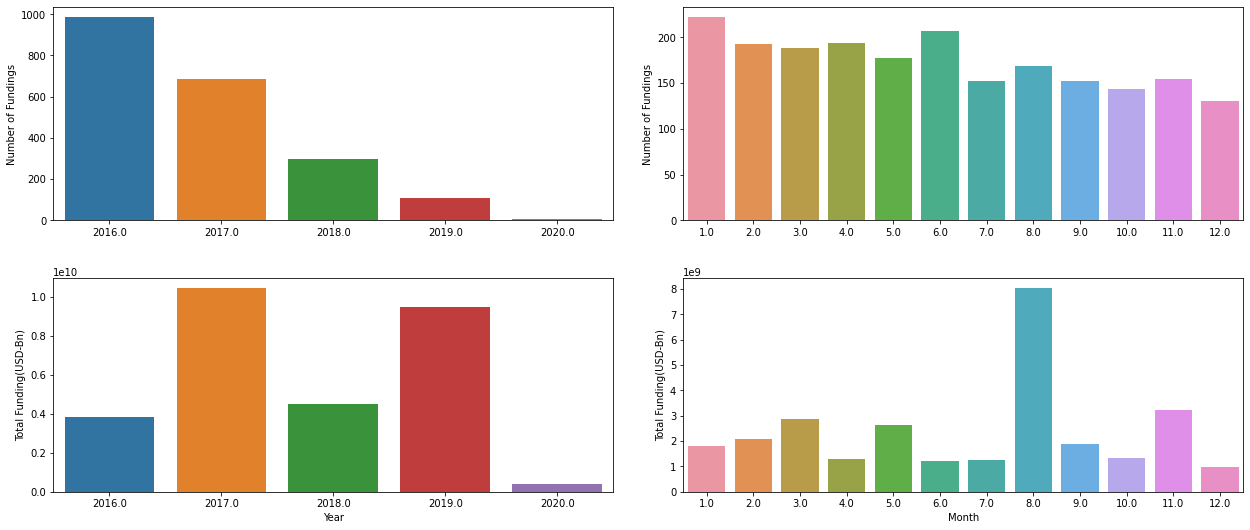

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,8))

sns.barplot(x=per_year_funding.index, y=per_year_funding['Number of Fundings'], data=per_year_funding, ax=axes[0,0], orient='v')
sns.barplot(x=per_month_funding.index, y=per_month_funding['Number of Fundings'], data=per_month_funding, ax=axes[0,1], orient='v')

sns.barplot(x=funding_total_yr.index, y=funding_total_yr['Total Funding(USD-Bn)'], data=funding_total_yr, ax=axes[1,0], orient='v')
sns.barplot(x=funding_total_month.index, y=funding_total_month['Total Funding(USD-Bn)'], data=funding_total_month, ax=axes[1,1], orient='v')

fig.tight_layout(pad=3)
plt.show()

In [47]:
fundings_count_city = pd.DataFrame(startup_data['City  Location'].value_counts().sort_values(ascending=False)[:10])
fundings_count_city.rename(columns={'City  Location':'Number of Fundings by City'}, inplace=True)
fundings_count_city.head()

,Number of Fundings by City
Bangalore,637
Mumbai,394
New Delhi,285
Gurugram,246
Pune,83


In [50]:
funding_total_city = pd.DataFrame(startup_data.groupby('City  Location')['Amount in USD'].sum()).sort_values(by="Amount in USD", ascending=False)[:10]
funding_total_city.rename(columns={'Amount in USD':'Total Funding by City(USD-Bn)'}, inplace=True)
funding_total_city.head()

,Total Funding by City(USD-Bn)
City Location,
Bangalore,15488469363
Mumbai,3326602015
Gurugram,2883966682
New Delhi,1270293875
Noida,1248344000


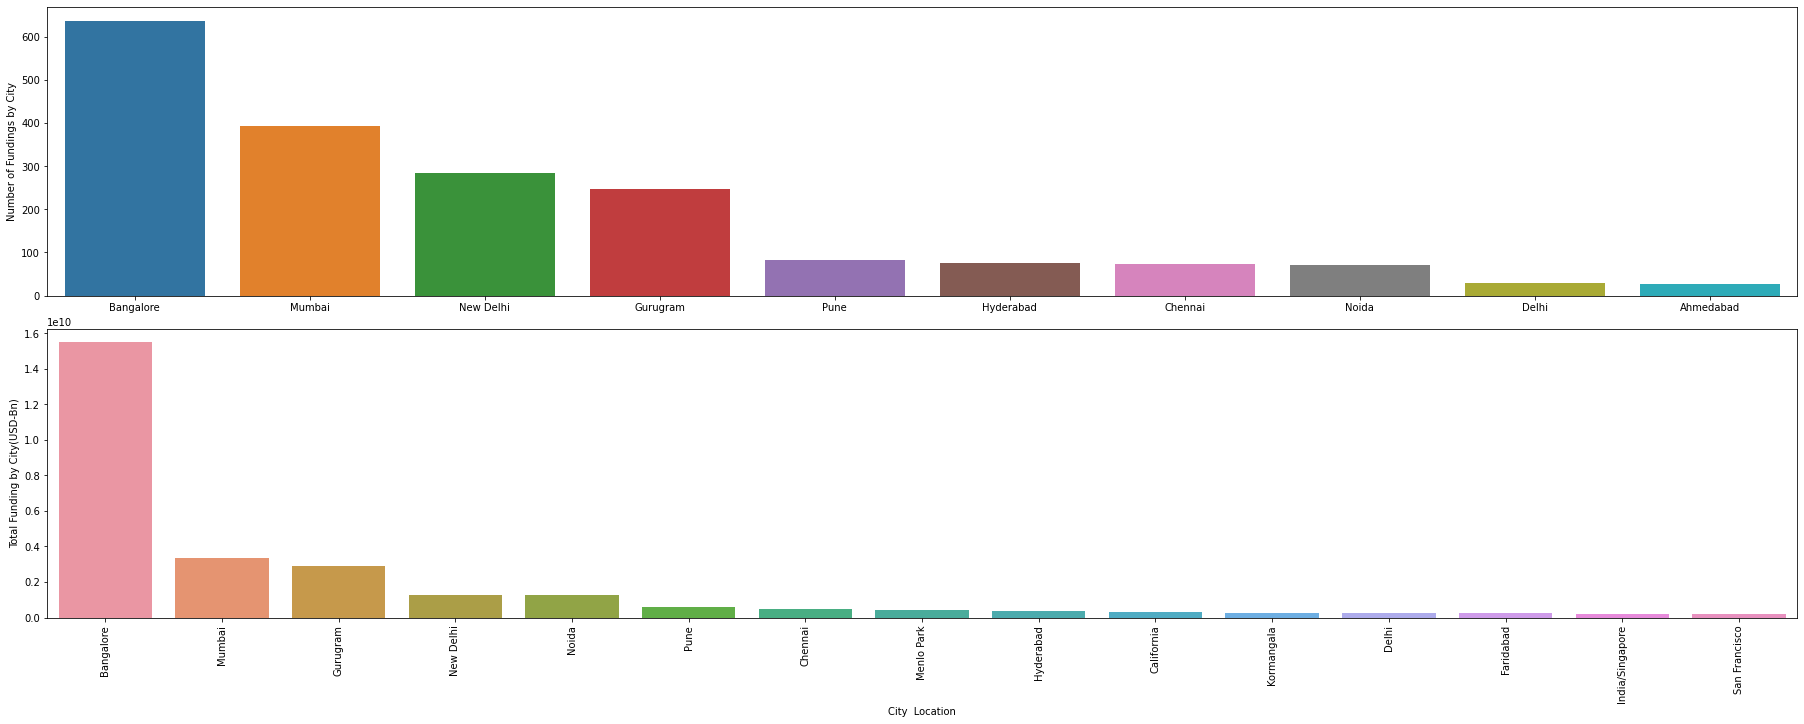

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 10))

sns.barplot(x=fundings_count_city.index, y=fundings_count_city['Number of Fundings by City'], data=fundings_count_city, ax=axes[0])
sns.barplot(x=funding_total_city.index, y=funding_total_city['Total Funding by City(USD-Bn)'], data=funding_total_city, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_city.index)

fig.tight_layout(pad=0.5)
plt.show()

In [51]:
fundings_count_industry = pd.DataFrame(startup_data['Industry Vertical'].value_counts().sort_values(ascending=False))[:15]
fundings_count_industry.rename(columns={'Industry Vertical':'Number of Fundings by Industry'}, inplace=True)
fundings_count_industry.head()

,Number of Fundings by Industry
Consumer Internet,928
Technology,476
E-Commerce,295
Healthcare,69
Finance,58


In [52]:
funding_total_industry = pd.DataFrame(startup_data.groupby('Industry Vertical')['Amount in USD'].sum()).sort_values(by="Amount in USD", ascending=False)[:15]
funding_total_industry.rename(columns={'Amount in USD':'Total Funding by Industry(USD-Bn)'}, inplace=True)
funding_total_industry.head()

,Total Funding by Industry(USD-Bn)
Industry Vertical,
E-Commerce,8228723717
Consumer Internet,6248891934
Transport,4068632394
Technology,2229457930
Fintech,1368311265


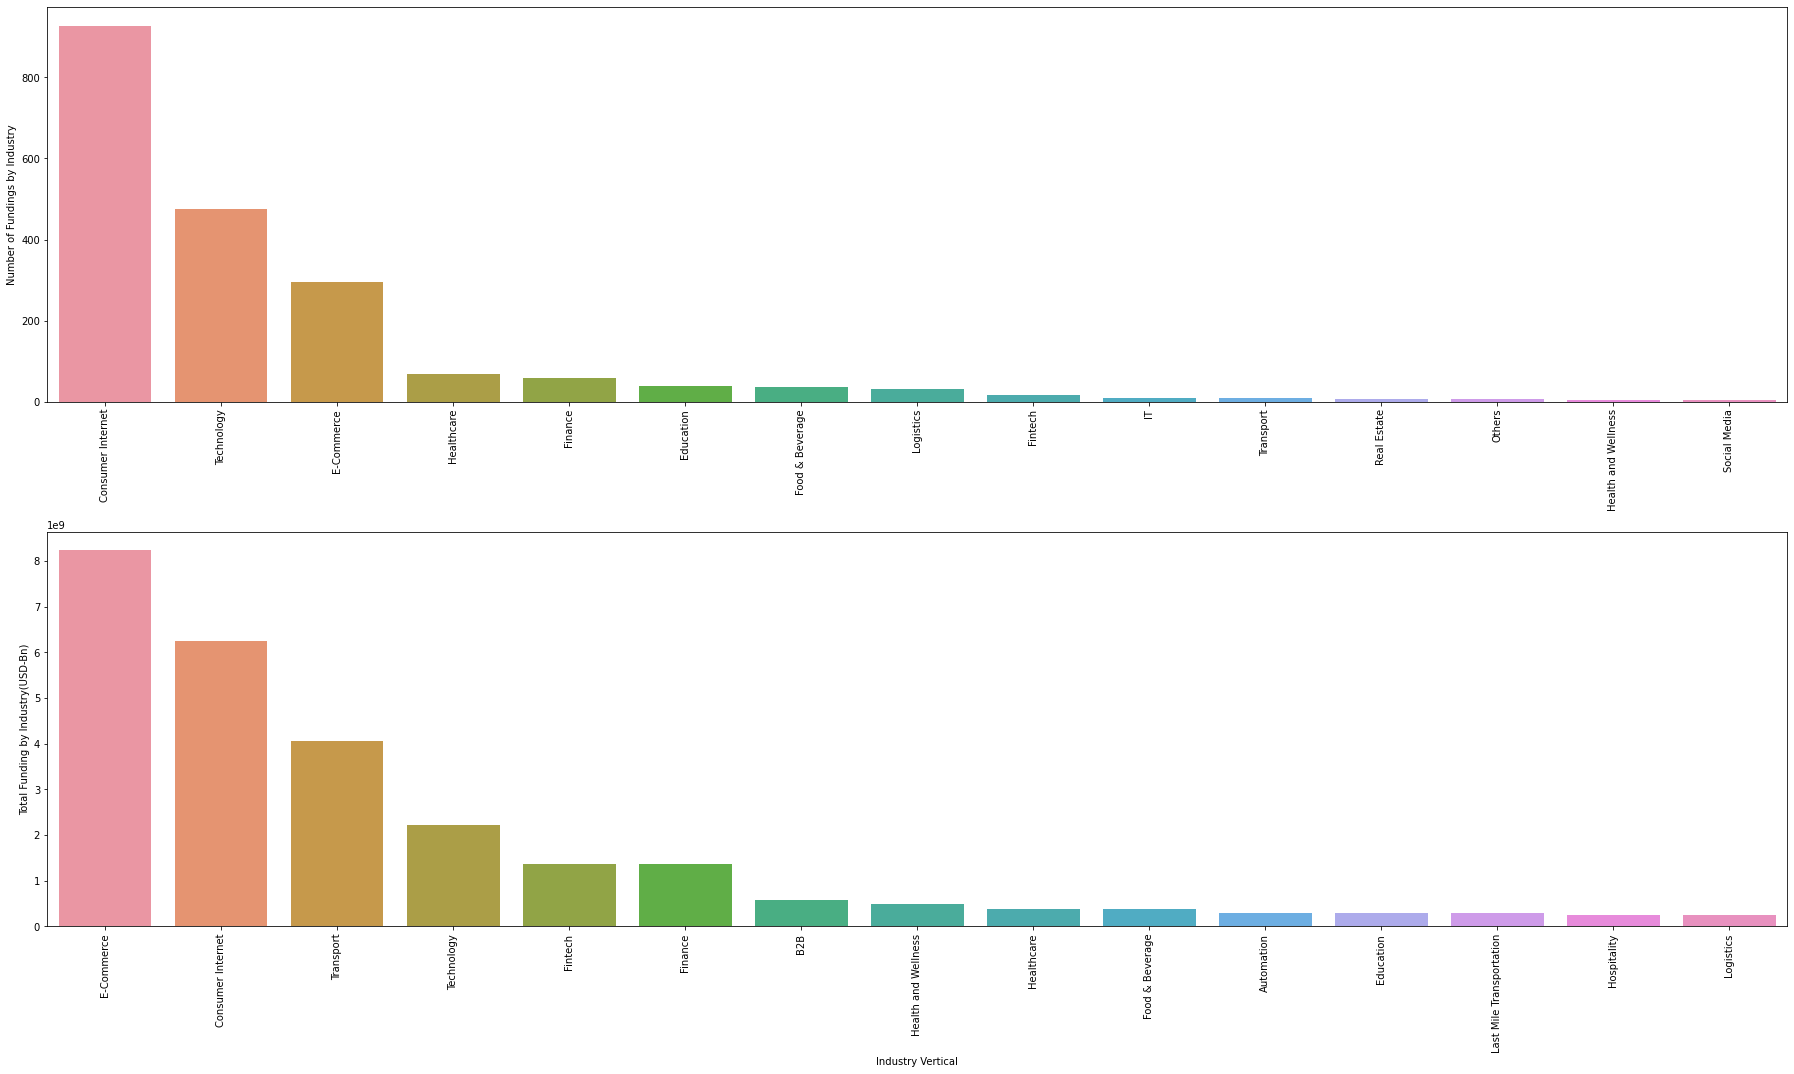

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=fundings_count_industry.index, y=fundings_count_industry['Number of Fundings by Industry'], data=fundings_count_industry, ax=axes[0]).set_xticklabels(rotation=90, labels=fundings_count_industry.index)
sns.barplot(x=funding_total_industry.index, y=funding_total_industry['Total Funding by Industry(USD-Bn)'], data=funding_total_industry, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_industry.index)

fig.tight_layout(pad=1)
#plt.xticks(rotation=90)
plt.show()

In [54]:
funding_count_investor = pd.DataFrame(startup_data['Investors Name'].value_counts()).sort_values(by='Investors Name', ascending=False)[:10]
funding_count_investor.rename(columns={'Investors Name': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)
funding_count_investor.head()

,Number of Investments by Investor
Ratan Tata,16
Indian Angel Network,16
Brand Capital,11
Venture Catalysts,11
Kalaari Capital,9


In [55]:
funding_total_investor = pd.DataFrame(startup_data.groupby(['Investors Name'])['Amount in USD'].sum()).sort_values(by="Amount in USD", ascending=False)[:15]
funding_total_investor.rename(columns={'Amount in USD':'Total Funding by Investor(USD-Bn)'}, inplace=True)
funding_total_investor.head()

,Total Funding by Investor(USD-Bn)
Investors Name,
Westbridge Capital,3900000000
Softbank,2500000000
SoftBank Group,1462000000
"Microsoft, eBay, Tencent Holdings",1400000000
Vijay Shekhar Sharma,1000150000


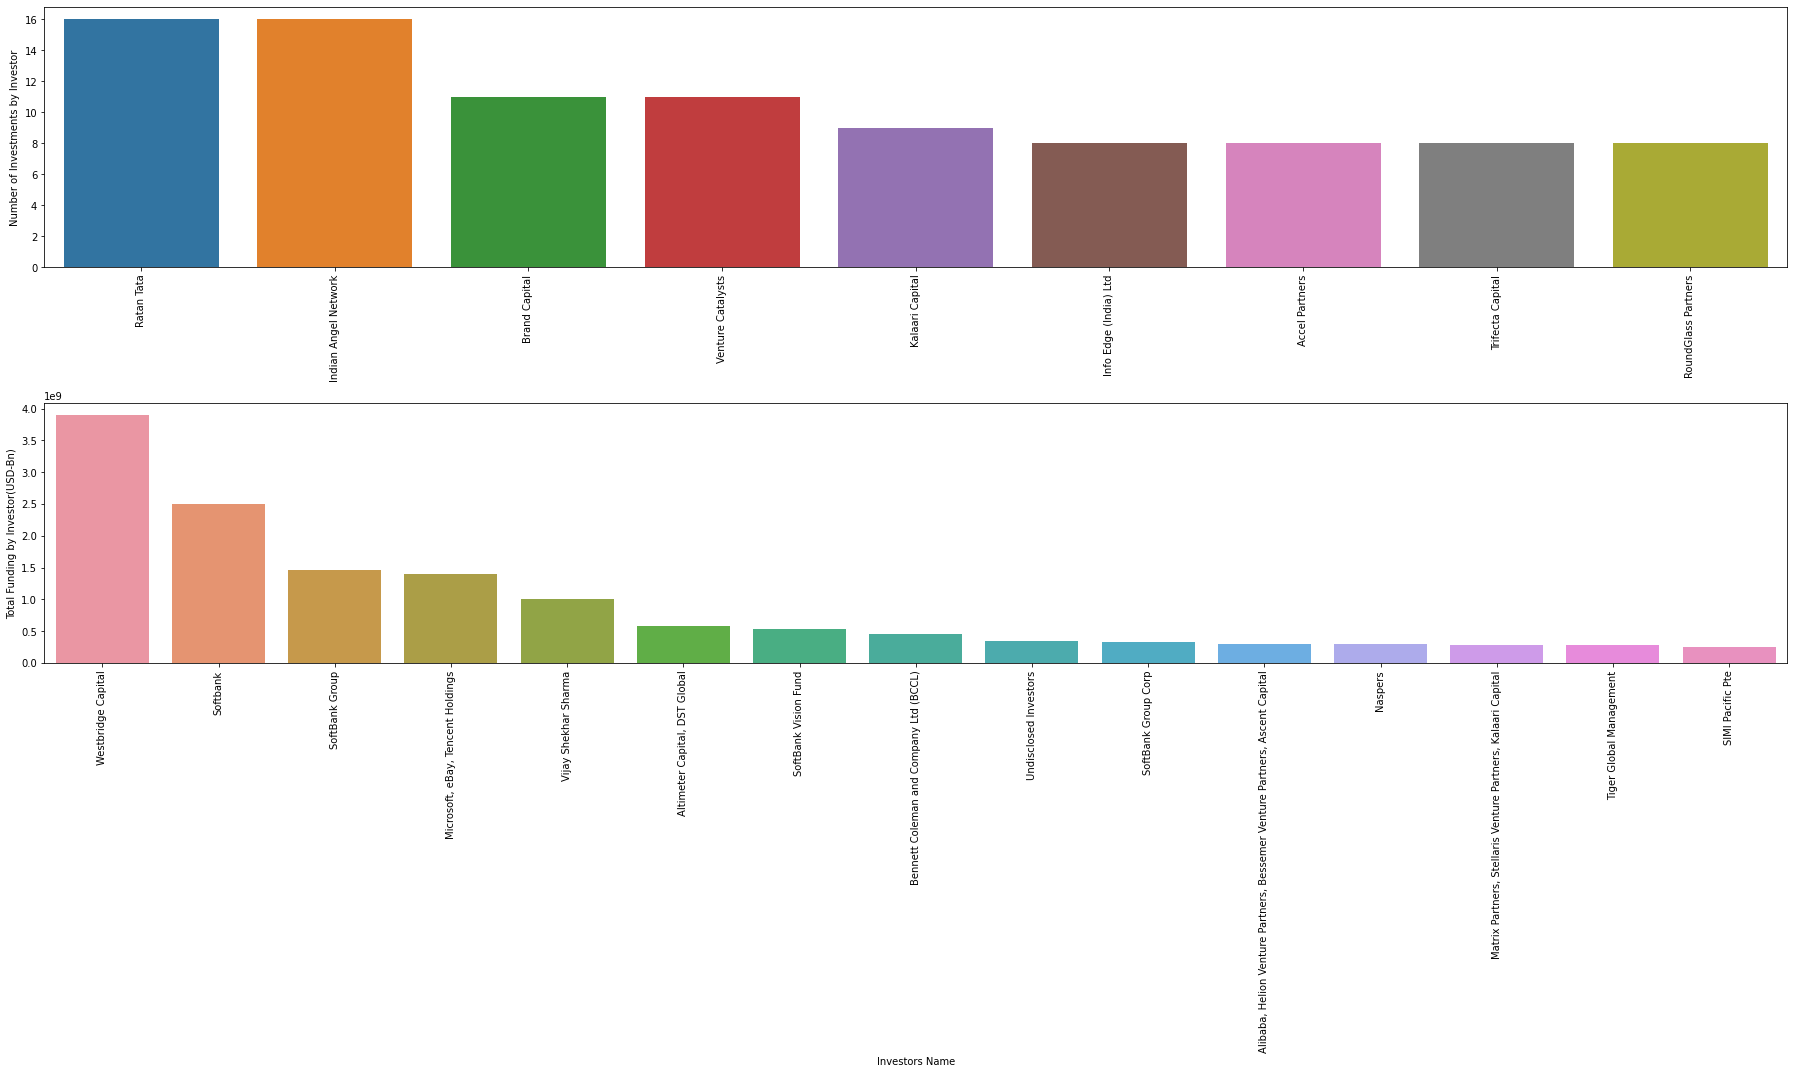

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=funding_count_investor.index, y=funding_count_investor['Number of Investments by Investor'], data=funding_count_investor, ax=axes[0]).set_xticklabels(rotation=90, labels=funding_count_investor.index)
sns.barplot(x=funding_total_investor.index, y=funding_total_investor['Total Funding by Investor(USD-Bn)'], data=funding_total_investor, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_investor.index)

fig.tight_layout(pad=1)
plt.show()

In [58]:
startup_data[startup_data['Investors Name'].isin(['Westbridge Capital', 'Softbank'])]

,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Month,Investment Range in USD
Date,,,,,,,,,,
2019-08-27,Rapido Bike Taxi,Transport,Bike Taxi,Bangalore,Westbridge Capital,Series B,3900000000,2019.0,8.0,300C+
2017-08-11,Flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,2500000000,2017.0,8.0,200C-300C


In [59]:
funding_count_company = pd.DataFrame(startup_data['Startup Name'].value_counts()).sort_values(by='Startup Name', ascending=False)[:15]
funding_count_company.rename(columns={'Startup Name': 'Number of Investments by Investor'}, inplace=True)
funding_count_company.head()

,Number of Investments by Investor
Meesho,6
Swiggy,5
Ola Cabs,5
NoBroker,5
Medinfi,5


In [60]:
funding_total_company = pd.DataFrame(startup_data.groupby('Startup Name')['Amount in USD'].sum()).sort_values(by='Amount in USD', ascending=False)[:15]
funding_total_company.rename(columns={'Amount in USD': "Total amount Raised by Startup (USD-Bn)"}, inplace=True)
funding_total_company.head()


,Total amount Raised by Startup (USD-Bn)
Startup Name,
Flipkart,4009700000
Rapido Bike Taxi,3900000000
Paytm,2468950000
Udaan,870000000
Ola,484500000


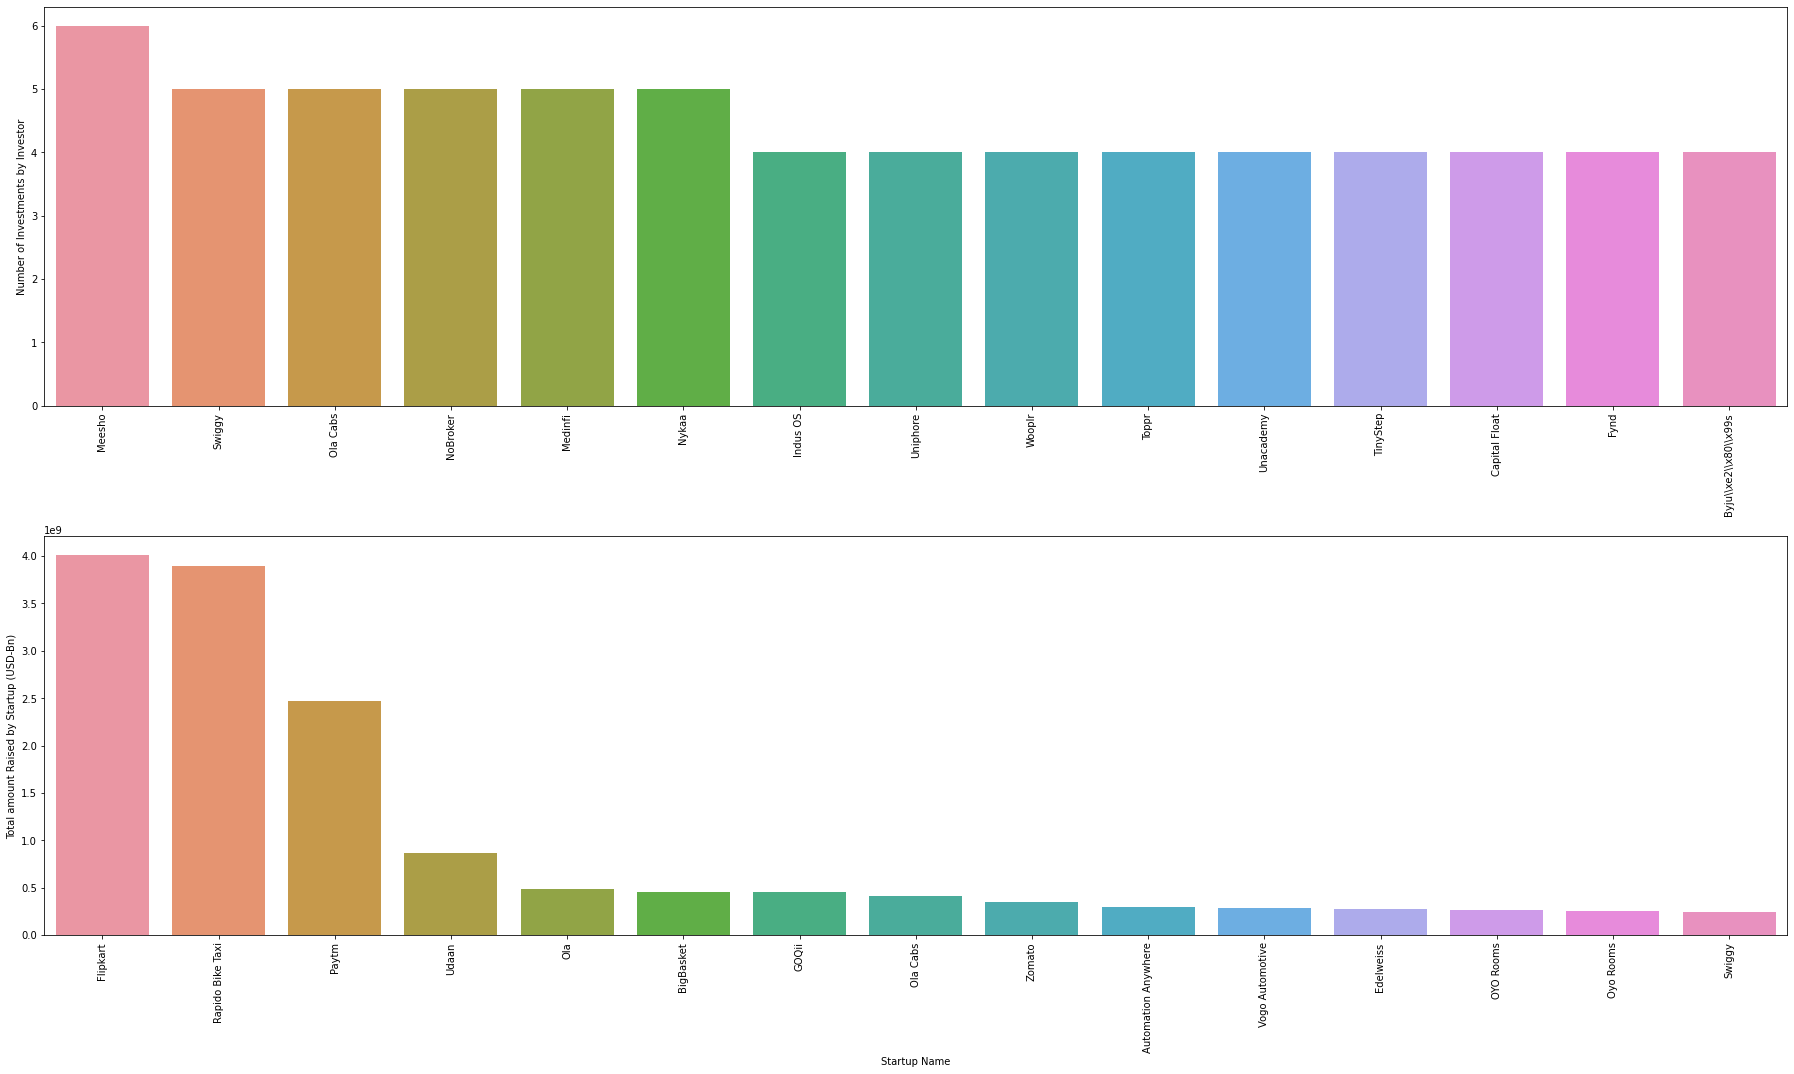

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25, 15))

sns.barplot(x=funding_count_company.index, y=funding_count_company['Number of Investments by Investor'], data=funding_count_company, ax=axes[0]).set_xticklabels(rotation=90, labels=funding_count_company.index)
sns.barplot(x=funding_total_company.index, y=funding_total_company['Total amount Raised by Startup (USD-Bn)'], data=funding_total_company, ax=axes[1]).set_xticklabels(rotation=90, labels=funding_total_company.index)

fig.tight_layout(pad=1)
plt.show()